# GALO RUIZ
## Student number A01799399
### 2oth July, 2022
### FPA3

Description of the dataset:<br>

Twitter US Airline Sentiment <br>

This sentiment analysis dataset contains tweets since Feb 2015 about each of the major US airline. Each tweet is classified either positive, negative or neutral. The included features including Twitter ID, sentiment confidence score, sentiments, negative reasons, airline name, retweet count, name, tweet text, tweet coordinates, date and time of the tweet, and the location of the tweet. <br>

Your main purpose here is to identify if the tweet is positive/negative/neutral, but other paths are also possible. <br>

Remember to model a cost benefit analysis. <br>

This is a text mining problem and it is a Sentiment Analysis, so we need to assign it a label. The labels we will use are **negative, neutral, or positive.** as stated in the description of the dataset. <br>
However this is also an association rule mining problem. Association rule mining is about finding frequent patterns, associations, correlations, or causal structures among sets of items, which is explained as a rule with the form: Antecedent -> Consequent. We can summarise it as a mathematical implication 'if A then B'. <br>
**In the case of the dataset, tweets should be classified as negative, neutral, or positive. In our text mining analysis we can find associations such as "upgrade" -> "positive", or "delay" -> "negative".**<br>

In [233]:
# load the Twitter dataset
import pandas as pd
dftwitter = pd.read_csv('Tweets.csv')
print('There are', len(dftwitter), 'messages in the dataset.')

# Take a look at the column names.
print("Columns: ", dftwitter.columns)

There are 14640 messages in the dataset.
Columns:  Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [234]:
print(len(dftwitter.columns))

15


In [235]:
dftwitter.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


There are 15 columns in the dataset. Some of them are not that relevant for the discussion. For instance, 'tweet_id', 'name', 'tweet_coord' or 'tweet_created' do not add any value to the task.

As I mentioned, it is a text mining problem but also an association rule problem. However, for the rest of the paper I will only develop the text mining side of the problem. 

The dataset has **three different classes, namely, positive, negative and neutral**. We have to remember that the dataset is about opinions from users in Twitter abot US airlines. 

In [236]:
dftwitter.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

The unique values of the 'airline_sentiment' column are 'positive', 'negative', or 'neutral', therefore we want to predict in which value an opinion would take. We can drop few columns and just keep the 'text' one as it is relevant as it contains all the opinions, and 'airline_sentiment' as it has the classification of the opinions. 

**Is this a classification, regression or clustering problem?** <br>
On one hand, clustering is about grouping individuals in a population together by their similarity, but without regard to any specific purpose. That is, to find homogeneous subgroups such that objects in the same group (clusters) are more similar to each other than the others. <br>
On the other hand, regression is about estimating or predicting, for each individual in a population, the numerical value of some variable. <br>
The main difference between **classification** and **regression** is that in regression "the outputs (y) are continuous values rather than categories" while "in classification, the outputs (y) are categories. These can be binary, for example, if we were classifying spam email vs not spam email. They can also be multiple categories" (https://towardsdatascience.com/beginners-guide-to-the-three-types-of-machine-learning-3141730ef45d). The later is known as **multiclass classification**. <br>
In the dataset we are using, the target is not a continuous value but rather a discrete category and, as we have negative, positive and neutral opinions, it is clearly a multiclass classification. 

In [237]:
dfnew = dftwitter[['text', 'airline_sentiment']]

In [238]:
dfnew.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [239]:
dfnew['target']="others"
dfnew.loc[(dfnew['airline_sentiment'].isin(['negative'])), 'target'] = 'negative'
dfnew.loc[(dfnew['airline_sentiment'].isin(['positive'])), 'target'] = 'positive'
dfnew.loc[(dfnew['airline_sentiment'].isin(['neutral'])), 'target'] = 'neutral'

In [240]:
dfnew.target.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [241]:
len(dfnew)

14640

In [242]:
len(dfnew.loc[dfnew['target'] == 'negative'])

9178

In [243]:
len(dfnew.loc[dfnew['target'] == 'positive'])

2363

In [244]:
len(dfnew.loc[dfnew['target'] == 'neutral'])

3099

As we can see, **out of the 14,640 instances, 9,178 are negative, 3,099 are netural, and 2,363 are positive.**

As we have seen it above, one problem is that **the dataset is that it is highly unbalanced.** Let's check again the number of 'neutral', 'positive', and 'negative' opinions. 

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [246]:
dftwitter.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

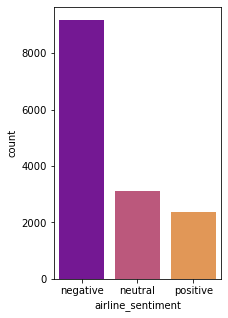

In [247]:
# Plot the figures

plt.figure(figsize=(3,5))
sns.countplot(dftwitter['airline_sentiment'], order =dftwitter.airline_sentiment.value_counts().index,palette= 'plasma')
plt.show()

As I mentioned, the dataset is highly imbalanced overall.

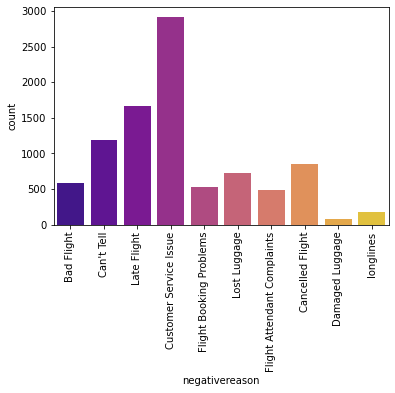

In [248]:
sns.countplot(data =dftwitter, x ="negativereason", palette='plasma')
plt.xticks(rotation =90);

In [249]:
print(dfnew.isnull().any())

text                 False
airline_sentiment    False
target               False
dtype: bool


As there are **no missing values** in the columns we are working on, therefore missing values do not represent a problem in our dataset. 

I can check the distribution by airline as the previous analysis was taking into account all the airlines.

In [250]:
#The number of tweets per airline
dftwitter['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [251]:
#How customers feel about each airline
pd.crosstab(dftwitter.airline, dftwitter.airline_sentiment)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


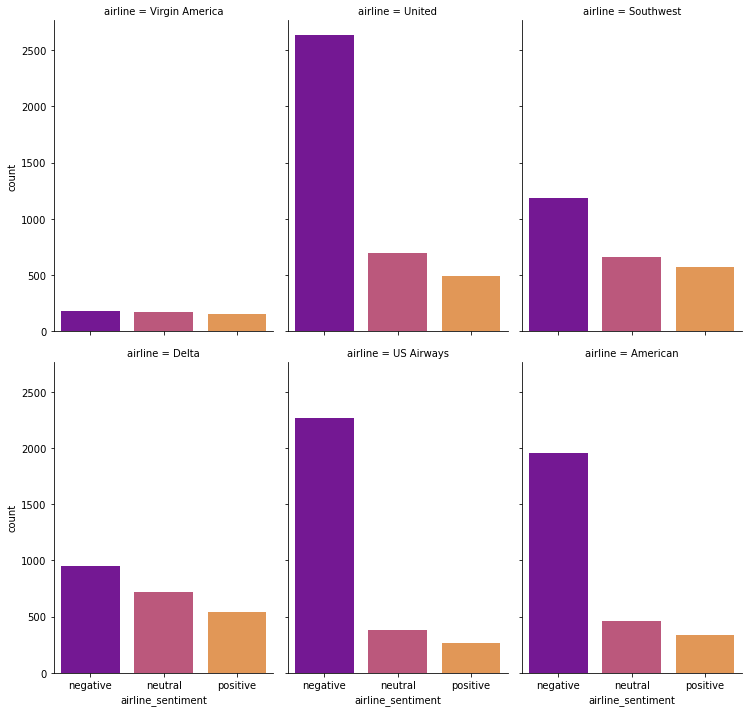

In [252]:
# Check the numbers by airline

air = sns.FacetGrid(dftwitter, col="airline", col_wrap=3, height=5, aspect =0.7)
air = air.map(sns.countplot, "airline_sentiment",order =dftwitter.airline_sentiment.value_counts().index, palette='plasma')
plt.show()

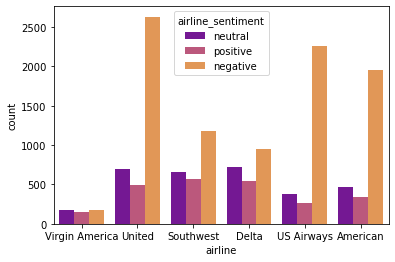

In [253]:
sns.countplot(data = dftwitter, x ="airline", hue = "airline_sentiment", palette='plasma');

If I brake down the dataset by airline some of the subsets are not that imbalanced. We can see that the figures for Virgin America are pretty similar, while the numbers of Delta are not that imbalanced. <br>
As we have seen, the negative opinions are the most in the dataset. I am therefore interested in checking the top 10 negative reasons.

Text(0, 0.5, 'Negative Reasons')

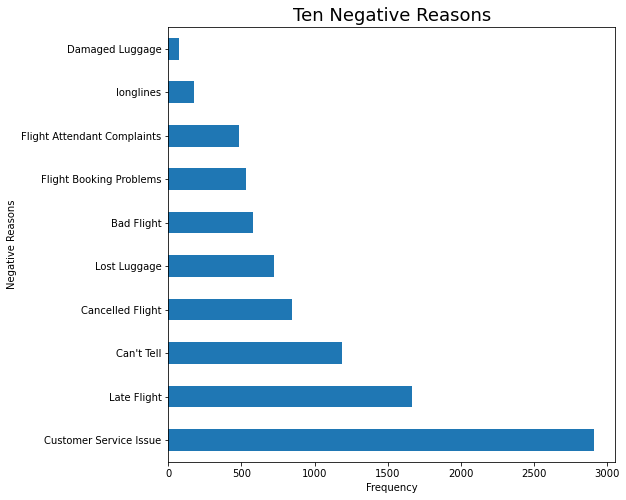

In [254]:
# Top 10 negative reasons
dftwitter.negativereason.value_counts().plot(kind='barh', figsize=(8,8))
plt.title('Ten Negative Reasons', fontsize=18)
plt.xlabel('Frequency')
plt.ylabel('Negative Reasons')

In [255]:
#The top 5 negative reasons
dftwitter.negativereason.value_counts().sort_values(ascending=False).head(5)

Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Name: negativereason, dtype: int64

We can see here the top 5 negative reasons that customers provided. It is not surprising to find those type of problems for them to rate the airline service as negative. 

I am interested in checking the distribution of words and I would try to remove words that are not necessary for the analysis. I will then use **stopwords** to remove English dictionary words and also **word frequencies**. 

In [256]:
import pandas as pd
dftwitter = pd.read_csv('Tweets.csv')

In [257]:
dftwitter.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

I analysed the dataset in the previous steps so I know that the there is a lot of text that it is not necesarilly useful for the rest of the analysis. I will use **stopwords from nltk** to remove some English dictionary words that do not add value. 

In [258]:
# from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/galo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [259]:
# print(stopwords.words('english'))

nltk.corpus.stopwords.words('english')
stopword_list = nltk.corpus.stopwords.words('english')
print(len(stopword_list), stopword_list[0:50])

179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']


I will use **WordCloud** to check the distribution of words in a graphic way. 

In [260]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dfComplaints = dftwitter.loc[dftwitter['airline_sentiment']=='negative']

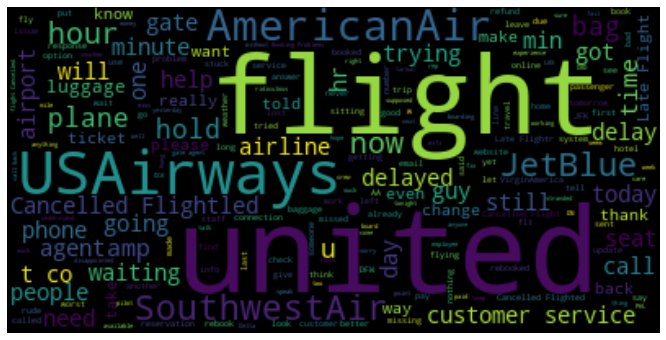

In [261]:
wordcloud = WordCloud().generate(' '.join(list(dfComplaints.text)))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's check the distribution using **FreqDist from nltk.**

In [262]:
# Let's check the distribution of words
from nltk.probability import FreqDist

In [263]:
dftext = dftwitter['text']

In [264]:
dftext.head(10)

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
7    @VirginAmerica Really missed a prime opportuni...
8      @virginamerica Well, I didn't…but NOW I DO! :-D
9    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object

<FreqDist with 14427 samples and 14640 outcomes>


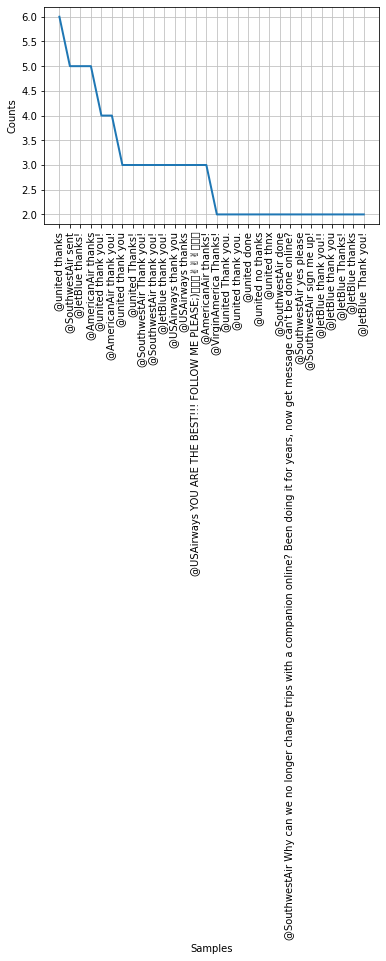

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [265]:
fdist = FreqDist(dftext)
print(fdist)
fdist.most_common(20)
fdist.plot(30, cumulative=False)

The dataset is showing a lot of words that are still not necessarilly useful for the analysis. I have used **stopwords** but I will clean more the data removing other words. For instance, I do not need the names of the airline, the usernames, URL's starting with http, and the like. 

In [266]:
import re
import os
import matplotlib.pyplot as plt
from nltk.tokenize import WordPunctTokenizer

In [267]:
notuseful = ["united", "AmericanAir", "SouthwestAir", "USAirways", "JetBlue", "VirginAmerica",
             "plane", "flight", "customer", "thing"]

In [268]:
def clean_text(str_in):
    
    res = ""
    str_in = str_in.lower()
    str_arr = str_in.split(' ')
    for word in str_arr:
        # make all words into lower case
        word = word.lower()
        # remove not useful words from the original text
        if '@' in word or word == '' or word[:1] == '&':
            continue
        if word.lower() in notuseful:
            continue
        if word.isnumeric():
            continue
        res = res + " " + word
    return res

In [269]:
dftext = dftext.apply(clean_text)

In [270]:
dftext.head(10)

0                                           what said.
1     plus you've added commercials to the experien...
2     i didn't today... must mean i need to take an...
3     it's really aggressive to blast obnoxious "en...
4                   and it's a really big bad about it
5     seriously would pay $30 a for seats that didn...
6     yes, nearly every time i fly vx this “ear wor...
7     really missed a prime opportunity for men wit...
8                     well, i didn't…but now i do! :-d
9     it was amazing, and arrived an hour early. yo...
Name: text, dtype: object

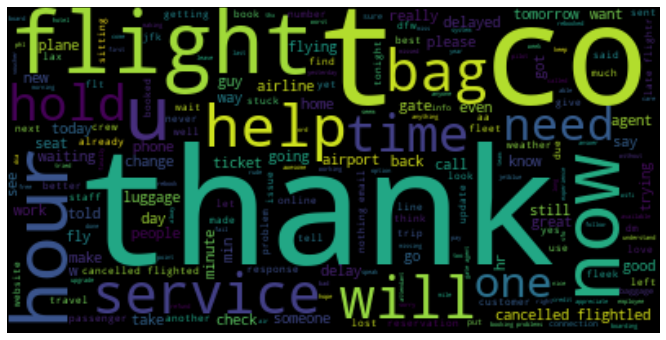

In [271]:
wordcloud = WordCloud().generate(' '.join(list(dftext)))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<FreqDist with 14312 samples and 14640 outcomes>


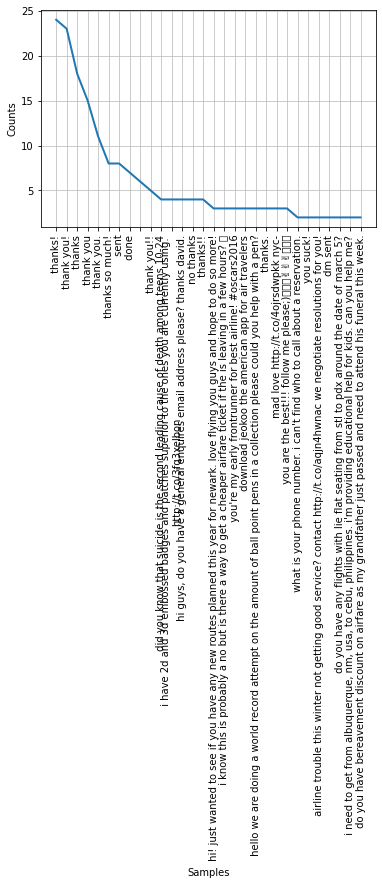

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [272]:
fdist = FreqDist(dftext)
print(fdist)
fdist.most_common(20)
fdist.plot(30, cumulative=False)

Lets build the classification models

As explained above, there are 3 possible values for the target, that is, 'neutral', 'positive', and 'negative'. Remember that there are 14,640 messages in the data set, and out of them, 9,178 are 'negative', 3,099 are 'neutral', while only 2,363 are 'positive'. I will perform two different algorithms, namely, Multinomial Naive Bayes, and KNN classification. 

In [273]:
dftwitter.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [274]:
dfnew = dftwitter[['text', 'airline_sentiment']]

In [275]:
dfnew.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [276]:
dfnew['target']="others"
dfnew.loc[(dfnew['airline_sentiment'].isin(['negative'])), 'target'] = 'negative'
dfnew.loc[(dfnew['airline_sentiment'].isin(['positive'])), 'target'] = 'positive'
dfnew.loc[(dfnew['airline_sentiment'].isin(['neutral'])), 'target'] = 'neutral'

In [277]:
dfnew.target.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [278]:
len(dfnew)

14640

In [279]:
# checking the number of negative opinions

len(dfnew.loc[dfnew['target'] == 'negative'])

9178

In [280]:
# checking the number of positive opinions

len(dfnew.loc[dfnew['target'] == 'positive'])

2363

In [281]:
# checking the number of neutral opinions

len(dfnew.loc[dfnew['target'] == 'neutral'])

3099

As I mentioned earlier, the dataset is highly imbalanced so I would have to either oversample the feature that has the least number or to undersample those that have higher numbers than the lowest, in this case, the 'positives'. I prefer to do undersampling. 

In [282]:
dfneg=dfnew.loc[dfnew['target'] == 'negative']
dfpos=dfnew.loc[dfnew['target'] == 'positive']
dfneu=dfnew.loc[dfnew['target'] == 'neutral']
# len(dfneg)

In [283]:
# undersampling the negatives

dfneg=dfneg.sample(n=2363)
len(dfneg)

2363

In [284]:
# undersampling the neutrals

dfneu=dfneu.sample(n=2363)
len(dfneu)

2363

In [285]:
# the new sample

dfnew=dfneg.append(dfneu).append(dfpos)
len(dfnew)

7089

Lets build the model.

In [286]:
from sklearn.model_selection import train_test_split
# let's make sure all elements in airline_sentiment are strings.

corpus_text = dfnew.text

corpus_text = [str (item) for item in corpus_text]

y = dfnew.target # target has three possible values. 

# Split the data.

X_train, X_test, y_train, y_test = train_test_split(corpus_text, y, test_size=0.2)

In [287]:
len(X_train)

5671

In [288]:
X_train[0:10]

['@AmericanAir thanks to FA Shawn for spectacular service on FLT 79 LHRDFW and to FA Susan for such a warm engaging onboard welcome',
 '@United you need to get it together 3 of 4 flights Cancelled Flightled stranded with no car and my baggage is lost!  You NEVER get it right.',
 '@JetBlue Thanks for the personalized customer service! #cannedtweet #autoresponse',
 '@SouthwestAir thank you so much completely made things right!',
 '@USAirways and despite tailwind… Will still be Late Flight.',
 '@united I sent an email describing my experience. Looking forward to a follow up to hopefully make it right.',
 '@VirginAmerica when are you putting some great deals from PDX to LAS or from LAS to PDX show me your love! http://t.co/enIQg0buzj',
 "@VirginAmerica Nice to see you expanding in Texas but don't forget about us here in #SanDiego. I would love to see more flights out of here!",
 '@SouthwestAir CEO Gary Kelly, "We are America\'s most loved and most flown airline!" #SouthwestRally #BWI #best

In [289]:
y_train[0:10]

14062    positive
2809     negative
7573     positive
4335     positive
9267     negative
4021      neutral
222      positive
432       neutral
5878     positive
7755      neutral
Name: target, dtype: object

In [290]:
# countvectorizer convertin the collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer
from collections import OrderedDict
vectorizer = CountVectorizer()
print(vectorizer)

CountVectorizer()


In [291]:
# sparse matrix

V_sparse =  vectorizer.fit_transform(X_train)
print("Type of V_sparse: ", type(V_sparse))
print("Shape of V_sparse: ",V_sparse.shape)
print("V_sparse:\n", V_sparse)

Type of V_sparse:  <class 'scipy.sparse.csr.csr_matrix'>
Shape of V_sparse:  (5671, 8729)
V_sparse:
   (0, 1101)	1
  (0, 7655)	1
  (0, 7793)	2
  (0, 3212)	2
  (0, 7015)	1
  (0, 3480)	2
  (0, 7262)	1
  (0, 6976)	1
  (0, 5649)	1
  (0, 3426)	1
  (0, 705)	1
  (0, 4773)	1
  (0, 1130)	1
  (0, 7500)	1
  (0, 7437)	1
  (0, 8366)	1
  (0, 3031)	1
  (0, 5650)	1
  (0, 8417)	1
  (1, 7793)	1
  (1, 1130)	1
  (1, 8085)	1
  (1, 8673)	2
  (1, 5412)	1
  (1, 3661)	2
  :	:
  (5669, 5528)	2
  (5669, 5551)	1
  (5669, 5965)	1
  (5669, 7206)	1
  (5669, 5889)	1
  (5669, 1831)	1
  (5669, 5876)	1
  (5669, 1163)	1
  (5669, 3280)	1
  (5669, 5659)	1
  (5670, 3480)	1
  (5670, 1130)	1
  (5670, 8417)	1
  (5670, 8085)	1
  (5670, 8673)	2
  (5670, 5344)	1
  (5670, 8676)	1
  (5670, 3831)	1
  (5670, 2682)	1
  (5670, 6391)	1
  (5670, 4506)	1
  (5670, 4942)	1
  (5670, 2740)	1
  (5670, 8517)	1
  (5670, 1415)	1


In [292]:
X = vectorizer.fit_transform(X_train).todense()
print("Type of X: ", type(X))
print("Shape of X: ",X.shape)
print("X:\n", X)

Type of X:  <class 'numpy.matrix'>
Shape of X:  (5671, 8729)
X:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [293]:
V_sparse =  vectorizer.transform(X_test)
print("Type of V_sparse: ", type(V_sparse))
print("Shape of V_sparse: ",V_sparse.shape)
print("V_sparse:\n", V_sparse)

Type of V_sparse:  <class 'scipy.sparse.csr.csr_matrix'>
Shape of V_sparse:  (1418, 8729)
V_sparse:
   (0, 1101)	1
  (0, 1508)	1
  (0, 1844)	1
  (0, 3217)	1
  (0, 3480)	1
  (0, 3532)	1
  (0, 3661)	1
  (0, 3898)	1
  (0, 7740)	1
  (0, 7793)	1
  (1, 1101)	1
  (1, 1130)	1
  (1, 1293)	1
  (1, 1508)	1
  (1, 4377)	1
  (1, 4392)	1
  (1, 4850)	1
  (1, 4893)	1
  (1, 5091)	1
  (1, 5344)	1
  (1, 5700)	1
  (1, 6635)	1
  (1, 7649)	1
  (1, 7793)	1
  (1, 8372)	1
  :	:
  (1415, 8156)	1
  (1415, 8171)	1
  (1415, 8547)	1
  (1416, 4837)	1
  (1416, 8085)	1
  (1417, 1130)	1
  (1417, 1160)	1
  (1417, 1839)	1
  (1417, 2019)	1
  (1417, 3298)	1
  (1417, 3388)	1
  (1417, 3558)	1
  (1417, 4377)	2
  (1417, 5344)	1
  (1417, 5615)	1
  (1417, 5649)	1
  (1417, 5858)	1
  (1417, 6016)	2
  (1417, 7212)	1
  (1417, 7374)	1
  (1417, 7668)	1
  (1417, 7793)	1
  (1417, 7828)	1
  (1417, 8085)	1
  (1417, 8526)	1


In [294]:
from sklearn.naive_bayes import MultinomialNB

print(X.shape)
clf = MultinomialNB().fit(X, y_train)

(5671, 8729)


After applying the algorithm, I would like to check if the model is working or not. I will enter few opinions, some of them not related at all to flights just to test the model. 

In [295]:
TestSet1=['seats are very uncomfortable', 'I like tennis', 'the screen did not work', 'best flight ever', 'we arrived earlier', 'upgrade', 'football is good']
X_new_counts = vectorizer.transform(TestSet1)

predicted = clf.predict(X_new_counts)

print(predicted)

['negative' 'neutral' 'negative' 'positive' 'negative' 'positive'
 'positive']


It seems that the **multinomial NB model is working.** It is predicting quite well. However I want to check the performance of the model. 

In [296]:
# Performance of NB Classifier
import numpy as np
#X_new_counts = vectorizer.transform(X_test)

predicted = clf.predict(V_sparse)

np.mean(predicted == y_test)

0.7059238363892807

In [297]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.67      0.85      0.75       476
     neutral       0.70      0.51      0.59       463
    positive       0.76      0.75      0.75       479

    accuracy                           0.71      1418
   macro avg       0.71      0.70      0.70      1418
weighted avg       0.71      0.71      0.70      1418



Even though the accuracy is not that high I believe it is quite fair. Remember that the sample was divided in three balanced classes each of them composed by 2,363 opinions.


In [298]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
plt.figure(figsize=(4,6))

mat = confusion_matrix(y_test, predicted)
print(mat)

[[405  43  28]
 [141 237  85]
 [ 61  59 359]]


<Figure size 288x432 with 0 Axes>

In [299]:
def plot_confusion_matrix(actual, predicted, labels):
    %matplotlib inline
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    plt.figure(figsize=(4,6))    
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
    #print(mat)
    
    plt.xlabel('true label')
    plt.ylabel('predicted label');

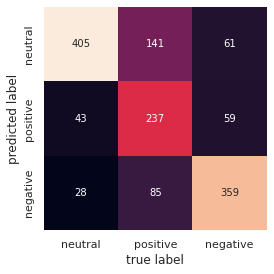

In [300]:
plot_confusion_matrix(y_test, predicted, y_test.unique())

In [135]:
show_result = pd.DataFrame({'test':y_test,'predicted':predicted},columns = ['test','predicted'])
show_result                                           

,test,predicted
10713,negative,negative
12498,negative,negative
10566,negative,negative
6968,positive,neutral
10793,neutral,negative
...,...,...
13982,neutral,negative
13882,positive,positive
2844,positive,positive
633,negative,negative


I will now try with a second algorithm and that is KNN Classification using the pipeline.

In [301]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(corpus_text, y, test_size=0.2)
text_classifier_pipeline = Pipeline([('tfidf_knn', TfidfVectorizer()), ('clf_knn', KNeighborsClassifier(n_neighbors=5))])

text_classifier_pipeline.fit(X_train, y_train)
text_classifier = text_classifier_pipeline.fit(X_train, y_train)
predicted = text_classifier.predict(X_test)


In [302]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.66      0.65      0.65       468
     neutral       0.58      0.59      0.59       466
    positive       0.70      0.70      0.70       484

    accuracy                           0.65      1418
   macro avg       0.65      0.65      0.65      1418
weighted avg       0.65      0.65      0.65      1418



In [303]:
mat = confusion_matrix(y_test, predicted)
print(mat)

[[302 116  50]
 [ 94 276  96]
 [ 61  83 340]]


In [304]:
def plot_confusion_matrix(actual, predicted, labels):
    %matplotlib inline
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    plt.figure(figsize=(4,6))    
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
    #print(mat)
    
    plt.xlabel('true label')
    plt.ylabel('predicted label');

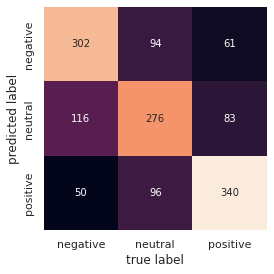

In [305]:
plot_confusion_matrix(y_test, predicted, y_test.unique())

In [306]:
show_result = pd.DataFrame({'test':y_test,'predicted':predicted},columns = ['test','predicted'])
show_result        

,test,predicted
2107,negative,negative
14099,neutral,positive
4459,negative,negative
13514,neutral,positive
10315,negative,negative
...,...,...
7958,positive,positive
4131,neutral,negative
14259,neutral,positive
6071,neutral,neutral


In [307]:
print(X.shape)
clf = KNeighborsClassifier().fit(X, y_train)

TestSet2=['seats are very uncomfortable', 'I like tennis', 'the screen did not work', 'best flight ever', 'we arrived earlier', 'upgrade', 'football is good']
X_new_counts2 = vectorizer.transform(TestSet2)

predicted = clf.predict(X_new_counts2)

print(predicted)

(5671, 8729)
['neutral' 'neutral' 'neutral' 'neutral' 'negative' 'positive' 'neutral']



As we can see, the **KNN algorithm is not that precise.** It is giving a worse accuracy value and it is not predicting that good the tests. I would try a third algorithm, in this case **logistic regression**.<br>

In [308]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(corpus_text, y, test_size=0.2)
text_classifier_pipeline = Pipeline([('tfidf_logit', TfidfVectorizer()), ('clf_logit', LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'))])

text_classifier_pipeline.fit(X_train, y_train)
text_classifier = text_classifier_pipeline.fit(X_train, y_train)
predicted = text_classifier.predict(X_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.73      0.80      0.76       457
     neutral       0.71      0.71      0.71       472
    positive       0.80      0.73      0.77       489

    accuracy                           0.75      1418
   macro avg       0.75      0.75      0.75      1418
weighted avg       0.75      0.75      0.75      1418



In [309]:
mat = confusion_matrix(y_test, predicted)
print(mat)

[[365  59  33]
 [ 85 333  54]
 [ 53  77 359]]


In [310]:
def plot_confusion_matrix(actual, predicted, labels):
    %matplotlib inline
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    plt.figure(figsize=(4,6))    
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
    #print(mat)
    
    plt.xlabel('true label')
    plt.ylabel('predicted label');

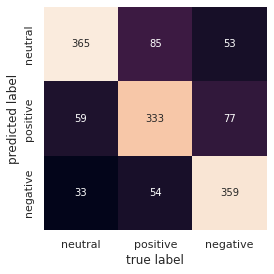

In [311]:
plot_confusion_matrix(y_test, predicted, y_test.unique())

In [312]:
show_result = pd.DataFrame({'test':y_test,'predicted':predicted},columns = ['test','predicted'])
show_result      

,test,predicted
6255,neutral,neutral
4543,positive,positive
5161,positive,positive
6296,negative,neutral
12253,negative,negative
...,...,...
5077,neutral,neutral
13808,neutral,neutral
4862,neutral,neutral
1103,positive,positive


In [313]:
print(X.shape)
clf = LogisticRegression().fit(X, y_train)

TestSet3=['seats are very uncomfortable', 'I like tennis', 'the screen did not work', 'best flight ever', 'we arrived earlier', 'upgrade', 'football is good']
X_new_counts3 = vectorizer.transform(TestSet3)

predicted = clf.predict(X_new_counts3)

print(predicted)

(5671, 8729)
['neutral' 'positive' 'positive' 'positive' 'neutral' 'negative'
 'negative']


Apparently **logistic regression** is performing better. However I can see that it is not solving well the tests. I would then try a fourth algorithm, **Support vector machines (SVMs).**

In [314]:
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(corpus_text, y, test_size=0.2)
text_classifier_pipeline = Pipeline([('tfidf_logit', TfidfVectorizer()), ('clf_logit', LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'))])

text_classifier_pipeline.fit(X_train, y_train)
text_classifier = text_classifier_pipeline.fit(X_train, y_train)
predicted = text_classifier.predict(X_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.77      0.77      0.77       476
     neutral       0.72      0.74      0.73       472
    positive       0.79      0.77      0.78       470

    accuracy                           0.76      1418
   macro avg       0.76      0.76      0.76      1418
weighted avg       0.76      0.76      0.76      1418



In [315]:
mat = confusion_matrix(y_test, predicted)
print(mat)

[[368  74  34]
 [ 64 347  61]
 [ 44  63 363]]


In [316]:
def plot_confusion_matrix(actual, predicted, labels):
    %matplotlib inline
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    plt.figure(figsize=(4,6))    
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
    #print(mat)
    
    plt.xlabel('true label')
    plt.ylabel('predicted label');

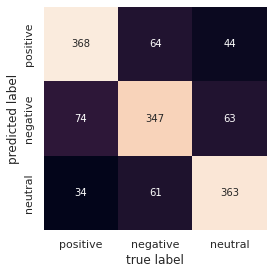

In [317]:
plot_confusion_matrix(y_test, predicted, y_test.unique())

In [318]:
show_result = pd.DataFrame({'test':y_test,'predicted':predicted},columns = ['test','predicted'])
show_result  

,test,predicted
4449,positive,positive
1781,negative,neutral
582,negative,neutral
10346,negative,negative
8304,positive,positive
...,...,...
6447,negative,positive
1584,negative,negative
518,negative,negative
9439,negative,negative


In [319]:
print(X.shape)
clf = SGDClassifier().fit(X, y_train)

TestSet3=['seats are very uncomfortable', 'I like tennis', 'the screen did not work', 'best flight ever', 'we arrived earlier', 'upgrade', 'football is good']
X_new_counts3 = vectorizer.transform(TestSet3)

predicted = clf.predict(X_new_counts3)

print(predicted)

(5671, 8729)
['positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'neutral']


SVM has a score very similar to logistic regression. So far we have tested 4 classifiers with good results. Logistic Regression, SVM and NB classifiers are very similar, over 70% accuracy, while K Neighbors classifiers has an accuracy of only 67%. We will come back to the classifiers when discussing the cost analysis. 

After I applied different classifiers, I will now perform topic modelling with Latent Dirichlet Allocation (LDA). We know that the goal with LDA is to understand topics across documents. "LDA gives a statistical model that describes the abstract topics in a document" (TextAnalytics_2022_05_Part2.pdf presentation, p. 58)

In [320]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings('ignore')

# The columns in the text file are delimited by TABs.
dftwitter = pd.read_csv('Tweets.csv')
df = dftwitter[['text', 'airline_sentiment']]

# Let's check what the data set consists of
print(df.head())

data_text = df['text']
print(type(data_text)) # We need to convert this to a list.

data_text = data_text.tolist() 
print("Type of data_text:", type(data_text))

target = df['airline_sentiment'] 
print("Type of target:", type(target)) # We need to convert to nparray (Numpy Array)
print(type(target.values)) # this conversion is easily done by '.values'


                                                text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative
<class 'pandas.core.series.Series'>
Type of data_text: <class 'list'>
Type of target: <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [321]:
documents = data_text
print(type(documents[0]))
from sklearn.feature_extraction.text import CountVectorizer
#print(dataset.data)
no_features = 1000

# data preparation
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

from sklearn.decomposition import LatentDirichletAllocation

# training the clustering model
no_topics = 8
no_words_per_topic = 5

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

# evaluation of cluster results
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic ", (topic_idx), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_words_per_topic)

<class 'str'>
Topic  0 usairways service customer thank bags
Topic  1 united gate waiting airport ticket
Topic  2 thanks united jetblue like weather
Topic  3 hold hour phone ve help
Topic  4 aa great new won seats
Topic  5 southwestair just fly united flight
Topic  6 flight cancelled hours flightled delayed
Topic  7 americanair jetblue http flight need


## Cost Analysis

We have calculated accuracy in the classification models I presented. Accuracy is usually defined as the proportion of correct decisions, that is, the number of correct decisions made divided by the total number of decisions made. It seems easy to measure nevertheless accuracy "unfortunately, it is usually too simplistic for applications of data mining techniques to real business problems" (Provost and Fawcett, p. 189). Therefore we need not to take accuracy as absolute. <br>
Another reason not to only take accuracy as the only measure for our model is that "in domains where one class is more prevalent than another accuracy can be greatly misleading" (Provost and Fawcett, p. 190). In the case of our dataset, the majority of opinions are negative. "The bottom line is that accuracy is the wrong thing to measure" (Provost and Fawcett, p. 191). <br>
Another problem of taking accuracy on its own is that it does not make any distinction between false positive and false negative errors. We need to be careful with the false positive and false negative errors as they have a cost that can be quite different. In the end, "ideally, we should estimate the cost or benefit of each decision a classifier can make" (Provost and Fawcett, p. 193). <br>
For this analysis I will use **expected profit (cost)** using the confusion matrix. I will use it for the **Logistic Regression** classifier. That is, I will calculate the values in order to use *equation 7-2* from Provost and Fawcett, p. 201, but extended to a confusion matrix of 3x3. <br>
The values I get from my confusion matrix of 3x3 from the Logistic Regression classifier are the following: 

T = 1418 (Total) <br>
P = 472 (Positives) <br> 
N = 489 (Negatives) <br> 
Nt = 457 (Neutrals) <br>
p(**p**) = 472/1418 = 0.33 <br>
p(**n**) = 489/1418 = 0.34 <br>
p(**nt**) = 457/1418 = 0.32 <br>
p(**Y|p**) = 333/472 = 0.71 <br>
P(**N|n**) = 359/489 = 0.73 <br>
p(**Nt|nt**) = 365/457 = 0.8 <br>
p(**Y|n**) = 77/489 = 0.16 <br>
p(**Nt|n**) = 53/489 = 0.11 <br>
p(**N|p**) = 54/472 = 0.11 <br>
p(**Nt|p**) = 85/472 = 0.18 <br>
p(**Y|nt**) = 59/457 = 0.13 <br>
p(**N|nt**) = 33/457 = 0.07 <br>
The dataset does not include any cost analysis figures therefore I will take some arbitrary values based on a cost. For instance, if the predicted value was positive but the actual opinion was negative should have a high cost because I am not doing anything about it. Also, if the opinion was predicted as negative but it was actually positive should have a high cost as I would take actions to mitigate the risk but the customer is not expecting anything as he had a good experience. <br>
If the opinion was predicted as negative but it was actually positive, b(**N,p**) = 5 <br>
If the opinion was predicted as negative but it was actually neutral, b(**N,nt**) = 3 <br>
If the opinion was predicted as positive but it was actually negative, b(**Y,n**) = 6 <br>
If the opinion was predicted as positive but it was actually neutral, b(**Y, nt**) = 2 <br>
If the opinion was predicted as neutral but it was actually positive, b(**Nt,p**) = 1 <br>
If the opinion was predicted as neutral but it was actually negative, b(**Nt,n**) = 4 <br>
Finally, I need to put an arbitrary cost to the predictions that are precise. As I am calculating costs rather than benefits, I will calculate a cost = 0 to all of them. <br>
If the opinion was predicted as positive and the result was actually positive, b(**Y,p**) = 0 <br>
If the opinion was predicted as negative and the result was actually negative, b(**N,n**) = 0 <br>
If the opinion was predicted as neutral and the result was actually neutral, b(**Nt,nt**) = 0 <br>

After the calculation using the values from above, I get <br>
Expected cost = - [(0.33)(0.73) + (0.34)(1.4) + (0.32)(0.47)] = - 0.87. <br>
This would be the cost considering the arbitrary values I set. Provost and Fawcett are performing an expected profit equation, however I want to know the cost. As they pointed out, "mathematically, there is no difference between a cost and a benefit except for the sign" (Provost and Fawcett, p. 200), that is why I am considering a negative number expressing the cost of the prediction analysis.

### Bibliography
Provost, F., and Fawcett, T. (2013). *Data Science for Business*. O'Reilly Media.